In [8]:
import numpy as np
import pandas as pd
# %pip install matplotlib
import matplotlib.pyplot as plt
# %pip install seaborn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

In [9]:
dataM = pd.read_csv('./ms_data.csv')
dataM[dataM.columns] = dataM[dataM.columns].astype('Int64')

FileNotFoundError: [Errno 2] No such file or directory: './ms_data.csv'

In [ ]:
dataM = dataM.drop('Final_EDSS', axis=1)
dataM = dataM.drop('Unnamed: 0', axis=1)

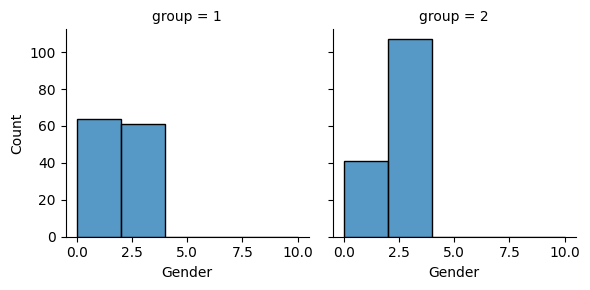

In [ ]:
g = sns.FacetGrid(dataM, col="group", margin_titles=True)

g.map_dataframe(sns.histplot, x="Gender", binwidth=2, binrange=(0, 10))

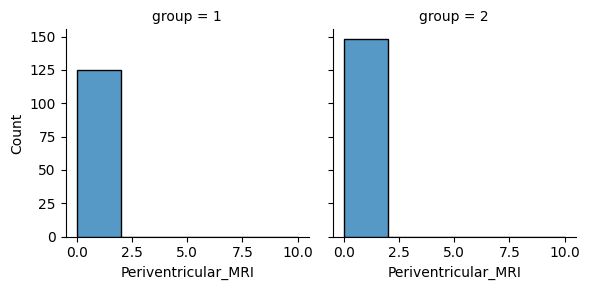

In [ ]:
g = sns.FacetGrid(dataM, col="group", margin_titles=True)

g.map_dataframe(sns.histplot, x="Periventricular_MRI", binwidth=2, binrange=(0, 10))

In [ ]:
dataM.groupby('group')["Periventricular_MRI"].mean()

group
1         0.8
2    0.256757
Name: Periventricular_MRI, dtype: Float64

In [ ]:
dataM.groupby('group')["Infratentorial_MRI"].mean()

group
1       0.504
2    0.114865
Name: Infratentorial_MRI, dtype: Float64

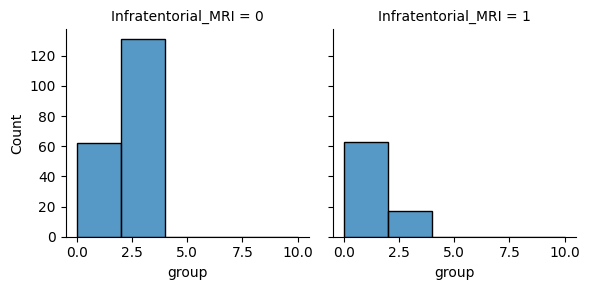

In [ ]:
g = sns.FacetGrid(dataM, col="Infratentorial_MRI", margin_titles=True)

g.map_dataframe(sns.histplot, x="group", binwidth=2, binrange=(0, 10))

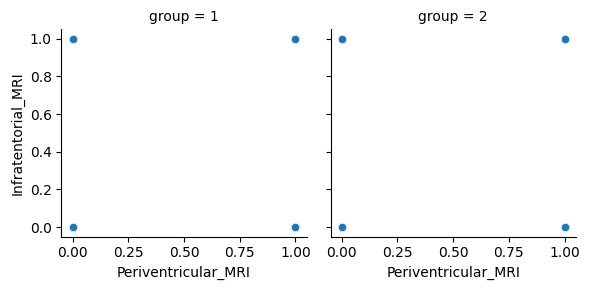

In [ ]:
g = sns.FacetGrid(dataM, col="group", margin_titles=True)

g.map_dataframe(sns.scatterplot, x="Periventricular_MRI", y="Infratentorial_MRI")

### Modelo 1 MODIFICANDO indices en initial-edss - random forest

In [ ]:
dataM['group'] = dataM['group'].replace(2, 0)

In [ ]:
# valores faltantes en initial_edss
indices_faltantes = dataM[dataM['Initial_EDSS'].isnull()].index
num_missing = len(indices_faltantes)
print(num_missing) #cuantos nan hay

148


In [ ]:
# Calcular la cantidad de valores a asignar a cada categoría
quarter = num_missing // 4
remainder = num_missing % 4

# Crear una nueva columna para indicar si se imputó un valor
dataM['imputado?'] = 0
dataM.loc[indices_faltantes, 'imputado?'] = 1

# dataM

In [ ]:
dataM['Initial_EDSS'].value_counts()

Initial_EDSS
1    87
2    31
3     7
Name: count, dtype: Int64

In [ ]:
# # Separar las características y la etiqueta
# # Shuffle Data
# dataM = dataM.sample(frac=1).reset_index(drop=True)

# X = dataM.drop('group', axis=1)
# y = dataM['group']

# X = X.drop('imputado?', axis=1)
# # X = X.drop('Initial_EDSS', axis=1)

# # Replace have of Initial_EDSS without NaNs with NaN

# has_initial = dataM[dataM['Initial_EDSS'].notnull()].index

# # Calcular la cantidad de valores a asignar a cada categoría
# fraction = 3

# quarter = len(has_initial) // fraction
# remainder = len(has_initial) % fraction

# # X["Initial_EDSS_Alt"] = X["Initial_EDSS"]
# X.loc[has_initial[:quarter], 'Initial_EDSS_Alt'] = np.nan

# X = X.drop('Initial_EDSS', axis=1)
# X = X.drop('Initial_EDSS_Alt', axis=1)

In [ ]:
# # Dividir los datos en entrenamiento, validación y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
# rf = RandomForestClassifier(random_state=42)
# rf.fit(X_train, y_train)

In [ ]:
# importances = rf.feature_importances_

# indices = np.argsort(importances)[::-1]

# fig, ax = plt.subplots()

# ax.barh(range(X_train.shape[1]), importances[indices])
# ax.set_yticks(range(X_train.shape[1]))
# ax.set_yticklabels(X_train.columns[indices])

# plt.show()

In [ ]:
# y_pred = rf.predict(X_val)
# # exactitud = accuracy_score(y_val, y_pred)


# fpr, tpr, _ = roc_curve(y_val, y_pred)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

# plt.title(f'Receiver Operating Characteristic - {roc_auc:.2f}')

In [ ]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_val, y_pred)

# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# plt.show()


## exactitud de los modelos dependiendo de cuanto porciento se le quita a initial

In [ ]:
# Function to shuffle and convert initial_edss to NaN
def shuffle_and_convert_nan(dataM, percentage):
  # Shuffle data
  dataM = dataM.sample(frac=1)

  has_initial = dataM[dataM['Initial_EDSS'].notnull()].index
  num_to_convert = int(len(has_initial) * percentage / 100)

  # Randomly select indices to convert to NaN
  indices_to_convert = np.random.choice(has_initial, size=num_to_convert, replace=False)
  dataM.loc[indices_to_convert, 'Initial_EDSS'] = np.nan

  # Drop shuffled and converted data
  X = dataM.drop('group', axis=1)
  y = dataM['group']
  X = X.drop('imputado?', axis=1)
  return X, y

# List to store AUC-ROC values
auc_scores = []
percentages = range(0, 101, 10)  # Percentages from 0% to 100% with 10% intervals

# Loop through different percentages
for percentage in percentages:
  # Separate features, target, and shuffle/convert data
  X, y = shuffle_and_convert_nan(dataM.copy(), percentage)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
  X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


  # Train 
  rf = RandomForestClassifier(random_state=42)
  rf.fit(X_train, y_train)

  # Evaluate
  y_pred = rf.predict(X_val)
  roc_auc = roc_auc_score(y_val, y_pred)
  auc_scores.append(roc_auc)


plt.figure(figsize=(10, 6))
for i, percentage in enumerate(percentages):
  plt.plot(percentages[i], auc_scores[i], 'o-',)

plt.xlabel("Percentage of Initial_EDSS converted to NaN (%)")
plt.ylabel("AUC-ROC")
plt.title("Performance of Random Forest Model with Missing Initial_EDSS Values")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'dataM' is not defined